<a href="https://colab.research.google.com/github/smoreira/TensorFlow2/blob/master/cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /cats_and_dogs_filtered.zip

--2020-05-02 11:15:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/cats_and_dogs_filtered.zip’

/cats_and_dogs_filt 100%[===================>]  65.43M  55.2MB/s    in 1.2s    

2020-05-02 11:15:07 (55.2 MB/s) - ‘/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.76.jpg', 'cat.634.jpg', 'cat.445.jpg', 'cat.67.jpg', 'cat.40.jpg', 'cat.777.jpg', 'cat.355.jpg', 'cat.308.jpg', 'cat.221.jpg', 'cat.703.jpg']
['dog.937.jpg', 'dog.805.jpg', 'dog.351.jpg', 'dog.319.jpg', 'dog.596.jpg', 'dog.102.jpg', 'dog.997.jpg', 'dog.742.jpg', 'dog.378.jpg', 'dog.345.jpg']


In [9]:
print('gatos:', len(os.listdir(validation_cats_dir)))
print('cachorros:', len(os.listdir(validation_dogs_dir)))

gatos: 500
cachorros: 500


In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam


In [0]:
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
history = model.fit_generator(train_generator,
                              validation_data = validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2
                              )

Epoch 1/15
100/100 - 9s - loss: 0.0784 - accuracy: 0.9710 - val_loss: 1.6860 - val_accuracy: 0.6940
Epoch 2/15
100/100 - 9s - loss: 0.0354 - accuracy: 0.9930 - val_loss: 1.9069 - val_accuracy: 0.6970
Epoch 3/15
100/100 - 9s - loss: 0.0415 - accuracy: 0.9895 - val_loss: 1.9834 - val_accuracy: 0.6900
Epoch 4/15
100/100 - 8s - loss: 0.0810 - accuracy: 0.9735 - val_loss: 1.7014 - val_accuracy: 0.6670
Epoch 5/15
100/100 - 9s - loss: 0.0132 - accuracy: 0.9940 - val_loss: 2.9289 - val_accuracy: 0.6660
Epoch 6/15
100/100 - 9s - loss: 0.0306 - accuracy: 0.9905 - val_loss: 1.3505 - val_accuracy: 0.6650
Epoch 7/15
100/100 - 8s - loss: 0.0418 - accuracy: 0.9860 - val_loss: 1.3269 - val_accuracy: 0.6530
Epoch 8/15
100/100 - 8s - loss: 0.0311 - accuracy: 0.9900 - val_loss: 2.4819 - val_accuracy: 0.6650
Epoch 9/15
100/100 - 9s - loss: 0.0287 - accuracy: 0.9910 - val_loss: 1.9727 - val_accuracy: 0.6580
Epoch 10/15
100/100 - 9s - loss: 0.0201 - accuracy: 0.9935 - val_loss: 2.8308 - val_accuracy: 0.6580

Text(0.5, 1.0, 'Training and validation loss')

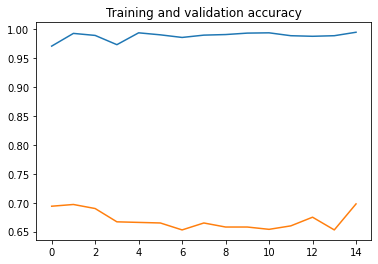

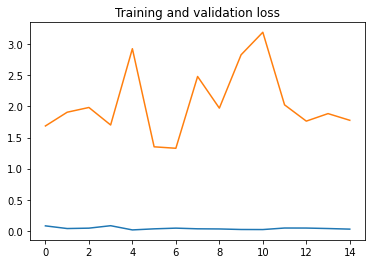

In [45]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )